<a href="https://colab.research.google.com/github/maik1105/MHSMA-Sperm-Morphology-Analysis-Dataset-/blob/main/MHSMA_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Set up Kaggle API (same as before)
!pip install -q kaggle
import json
import os
from pathlib import Path

KAGGLE_CREDS = {
    "username": "miguelangelgonzalez1",
    "key": "49612a0c855698fda610ac46bdf92f7b"
}

# Create config directory
kaggle_dir = Path.home() / ".kaggle"
kaggle_dir.mkdir(exist_ok=True)

# Write credentials
(kaggle_dir / "kaggle.json").write_text(json.dumps(KAGGLE_CREDS))
os.chmod(kaggle_dir / "kaggle.json", 0o600)

# Step 2: Download and extract properly
!kaggle datasets download -d orvile/mhsma-sperm-morphology-analysis-dataset --force
!unzip -q mhsma-sperm-morphology-analysis-dataset.zip -d mhsma_data_full

# Step 3: Locate the actual files
!find mhsma_data_full -name "*.npy"  # This will show exact paths

# Step 4: Load data with correct paths
import numpy as np

# Use the actual path from the find command output
base_path = "mhsma_data_full/hjygss6sw2-2/mhsma-dataset/mhsma-dataset/mhsma/"

try:
    x_train = np.load(f"{base_path}x_128_train.npy")
    y_acrosome = np.load(f"{base_path}y_acrosome_train.npy")
    y_head = np.load(f"{base_path}y_head_train.npy")
    y_vacuole = np.load(f"{base_path}y_vacuole_train.npy")
    y_tail = np.load(f"{base_path}y_tail_train.npy")

    print(f"✅ Success! Loaded {len(x_train)} training images")
    print(f"Sample labels - Acrosome: {y_acrosome[:5]}")

except Exception as e:
    print(f"❌ Error: {e}")
    print("\nTry these alternative paths:")
    print("1. mhsma_data_full/mhsma-sperm-morphology-analysis-dataset/hjygss6sw2-2/...")
    print("2. hjygss6sw2-2/mhsma-dataset/mhsma/")

Dataset URL: https://www.kaggle.com/datasets/orvile/mhsma-sperm-morphology-analysis-dataset
License(s): CC-BY-SA-3.0
  0% 0.00/13.5M [00:00<?, ?B/s]
100% 13.5M/13.5M [00:00<00:00, 308MB/s]
replace mhsma_data_full/hjygss6sw2-2/mhsma-dataset/mhsma-dataset/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace mhsma_data_full/hjygss6sw2-2/mhsma-dataset/mhsma-dataset/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace mhsma_data_full/hjygss6sw2-2/mhsma-dataset/mhsma-dataset/mhsma/x_128_test.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace mhsma_data_full/hjygss6sw2-2/mhsma-dataset/mhsma-dataset/mhsma/x_128_train.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace mhsma_data_full/hjygss6sw2-2/mhsma-dataset/mhsma-dataset/mhsma/x_128_valid.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace mhsma_data_full/hjygss6sw2-2/mhsma-dataset/mhsma-dataset/mhsma/x_64_test.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace mhsma_data_full/hjygss6sw2-2/mhsma-dataset/mhsma-dataset/mhsma/x

In [ ]:
#Data organization

import os
import shutil
from pathlib import Path

# 1. First verify the exact extraction path
extracted_path = None
for root, dirs, files in os.walk('.'):
    if 'x_128_train.npy' in files:
        extracted_path = Path(root)
        break

if not extracted_path:
    print("❌ Error: Couldn't find extracted files. Please check:")
    !find . -name "*.npy"  # Show all .npy files
else:
    print(f"✅ Found data at: {extracted_path}")

    # 2. Create organized directory structure
    data_dir = Path('organized_data')
    data_dir.mkdir(exist_ok=True)

    (data_dir/'128x128/train').mkdir(parents=True, exist_ok=True)
    (data_dir/'128x128/valid').mkdir(parents=True, exist_ok=True)
    (data_dir/'128x128/test').mkdir(parents=True, exist_ok=True)

    # 3. Copy (not move) files to avoid permission issues
    for res in ['128']:  # Just 128x128 for now
        for split in ['train', 'valid', 'test']:
            # Images
            src = extracted_path / f"x_{res}_{split}.npy"
            dest = data_dir / f"{res}x{res}/{split}/images.npy"
            if src.exists():
                shutil.copy(src, dest)
                print(f"Copied {src} → {dest}")

            # Labels
            for label in ['acrosome', 'head', 'vacuole', 'tail']:
                src = extracted_path / f"y_{label}_{split}.npy"
                dest = data_dir / f"{res}x{res}/{split}/{label}_labels.npy"
                if src.exists():
                    shutil.copy(src, dest)
                    print(f"Copied {src} → {dest}")

    print("✅ Organization complete!")
    !tree organized_data --filelimit 20  # Show the new structure

✅ Found data at: mhsma_data_full/hjygss6sw2-2/mhsma-dataset/mhsma-dataset/mhsma
Copied mhsma_data_full/hjygss6sw2-2/mhsma-dataset/mhsma-dataset/mhsma/x_128_train.npy → organized_data/128x128/train/images.npy
Copied mhsma_data_full/hjygss6sw2-2/mhsma-dataset/mhsma-dataset/mhsma/y_acrosome_train.npy → organized_data/128x128/train/acrosome_labels.npy
Copied mhsma_data_full/hjygss6sw2-2/mhsma-dataset/mhsma-dataset/mhsma/y_head_train.npy → organized_data/128x128/train/head_labels.npy
Copied mhsma_data_full/hjygss6sw2-2/mhsma-dataset/mhsma-dataset/mhsma/y_vacuole_train.npy → organized_data/128x128/train/vacuole_labels.npy
Copied mhsma_data_full/hjygss6sw2-2/mhsma-dataset/mhsma-dataset/mhsma/y_tail_train.npy → organized_data/128x128/train/tail_labels.npy
Copied mhsma_data_full/hjygss6sw2-2/mhsma-dataset/mhsma-dataset/mhsma/x_128_valid.npy → organized_data/128x128/valid/images.npy
Copied mhsma_data_full/hjygss6sw2-2/mhsma-dataset/mhsma-dataset/mhsma/y_acrosome_valid.npy → organized_data/128x12

In [ ]:
#Data Loading Class (OOP Aproach)
import numpy as np

class SpermDataset:
  def __init__(self, resolution='128x128', split='train'):
    self.base_path = f"organized_data/{resolution}/{split}/"
    self.images = np.load(self.base_path + "images.npy")
    self.labels = {
        'acrosome': np.load(self.base_path + "acrosome_labels.npy"),
        'head': np.load(self.base_path + "head_labels.npy"),
        'vacuole': np.load(self.base_path + "vacuole_labels.npy"),
        'tail': np.load(self.base_path + "tail_labels.npy")
    }

  def __len__(self):
    return len(self.images)

  def __getitem__(self, idx):
    return {
        'image': self.images[idx],
        'labels': {k: v[idx] for k, v in self.labels.items()}
    }

#Usage
train_data = SpermDataset('128x128', 'train')
print(f"Loaded {len(train_data)} training samples")
print("First sample labels:", train_data[0]['labels'])


Loaded 1000 training samples
First sample labels: {'acrosome': np.uint8(1), 'head': np.uint8(1), 'vacuole': np.uint8(1), 'tail': np.uint8(0)}


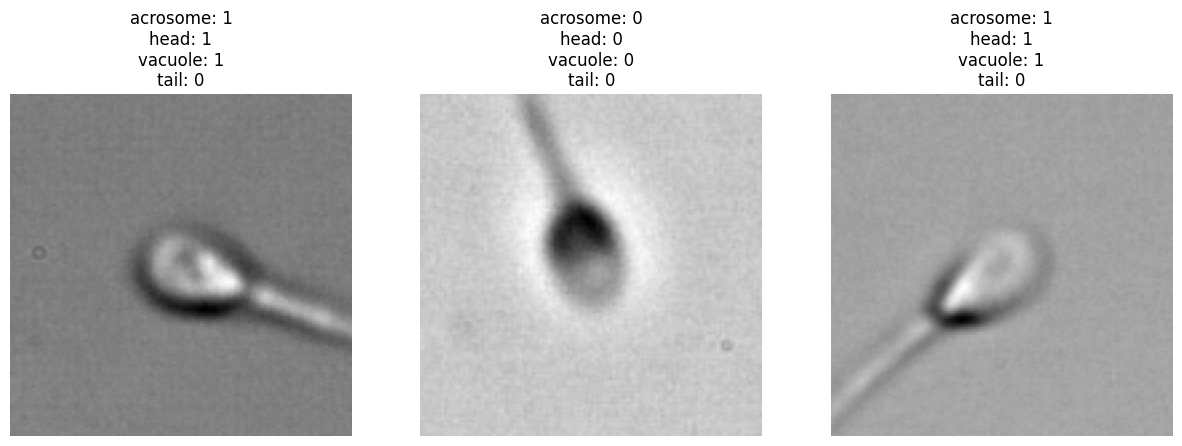

In [ ]:
#Data visualization
import matplotlib.pyplot as plt

def plot_samples(dataset, n =3):
  plt.figure(figsize=(15, 5))
  for i in range(n):
    sample = dataset[i]
    plt.subplot(1, n, i+1)
    plt.imshow(sample['image'], cmap='gray')
    plt.title("\n".join([f"{k}: {v}" for k, v in sample['labels'].items()]))
    plt.axis('off')
  plt.show()

plot_samples(train_data)

In [ ]:
#PyTorch DataLoader Setup
import torch
from torch.utils.data import Dataset, DataLoader

class TorchSpermDataset(Dataset):
  def __init__(self, resolution='128x128', split='train'):
    self.data = SpermDataset(resolution, split)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    sample = self.data[idx]
    return (
        torch.tensor(sample['image']).unsqueeze(0).float(), #Add channel dim
        torch.tensor(list(sample['labels'].values())).float()
    )

#Create dataloaders
train_loader = DataLoader(
    TorchSpermDataset('128x128', 'train'),
    batch_size=32,
    shuffle=True
)

#Example batch
images, labels = next(iter(train_loader))
print(f"Batch shape - Images: {images.shape}, Labels: {labels.shape}")

Batch shape - Images: torch.Size([32, 1, 128, 128]), Labels: torch.Size([32, 4])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#Define the CNN architecture

class SpermCNN(nn.Module):
  def __init__(self):
    super(SpermCNN, self).__init__()

    self.conv1 = nn.Conv2d(1, 16, kernel_size = 3, padding = 1)
    self.conv2 = nn.Conv2d(16, 32, kernel_size= 3, padding = 1)
    self.pool = nn.MaxPool2d(2, 2)
    self.dropout = nn.Dropout(0.3)

    self.fc1 = nn.Linear(32 * 32 * 32, 64) #After 2 poolings: 128->64->32
    self.fc2 = nn.Linear(64, 4) # 4 binary labels


  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x))) #(1, 128, 128) -> (16, 64, 64)
    x = self.pool(F.relu(self.conv2(x))) #(16, 64, 64) -> (32, 32, 32)
    x = x.view(-1, 32 * 32 *32) #Flatten
    x = self.dropout(F.relu(self.fc1(x)))
    x = torch.sigmoid(self.fc2(x)) #Sigmoid for multi-label
    return x


In [ ]:
#Training Setup

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SpermCNN().to(device)

criterion = nn.BCELoss() # Binary Cross-Entropy for multi-label classification
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
#Training loop
def train_model(model, dataloader, criterion, optimizer, epochs = 5):
  model.train()
  for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in dataloader:
      images = images.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()
      outputs = model (images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()


    print(f"Epoch [{epoch + 1}/{epochs}] Loss: {running_loss/len(dataloader): .4f}")

In [ ]:
#Training
train_model(model, train_loader, criterion, optimizer, epochs = 5)

Epoch [1/5] Loss:  19.1486
Epoch [2/5] Loss:  3.9814
Epoch [3/5] Loss:  0.4926
Epoch [4/5] Loss:  0.4896
Epoch [5/5] Loss:  0.4853


In [ ]:
#Create validation DataLoader

val_loader = DataLoader(
    TorchSpermDataset('128x128', 'valid'),
    batch_size = 32,
    shuffle = False #No nee to shuffle validation data
)

#Evaluate on Validation Set

def evaluate(model, val_loader, criterion):
  model.eval()
  total_loss = 0
  with torch.no_grad():
    for images, labels in val_loader:
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)
      loss = criterion(outputs, labels)
      total_loss += loss.item()
  avg_loss = total_loss/len(val_loader)
  print(f"Validation Loss: {avg_loss:.4f}")
  model.train()

evaluate(model, val_loader, criterion)

Validation Loss: 0.4378
